In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import sklearn
import tensorflow as tf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras import models , layers ,utils
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
def loading_preprossing(path):
    img_list = []
    for img_path in os.listdir(path):
        img = cv2.imread(path+'/'+img_path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(255,255))
        img = img /255
        img_list.append(img)
    return img_list

In [3]:
train_class1 = loading_preprossing('/kaggle/input/pnemonia/pnemonia/train/normal')
train_class2 = loading_preprossing('/kaggle/input/pnemonia/pnemonia/train/bacteria')
train_class3 = loading_preprossing('/kaggle/input/pnemonia/pnemonia/train/virus')

In [4]:
train_labels = [0]*len(train_class1) + [1] * len(train_class2) + [2] * len(train_class3)
train_list = train_class1 + train_class2 + train_class3
print("length of train data")
print("length of data is",len(train_list))
print("length of labels is",len(train_labels))

length of train data
length of data is 4174
length of labels is 4174


In [5]:
test_class1 = loading_preprossing('/kaggle/input/pnemonia/pnemonia/val/normal')
test_class2 = loading_preprossing('/kaggle/input/pnemonia/pnemonia/val/bacteria')
test_class3 = loading_preprossing('/kaggle/input/pnemonia/pnemonia/val/virus')

In [6]:
test_labels = [0]*len(test_class1) + [1] * len(test_class2) + [2] * len(test_class3)
test_list = test_class1 + test_class2 + test_class3
print("length of test data")
print("length of data is",len(test_list))
print("length of labels is",len(test_labels))

length of test data
length of data is 1044
length of labels is 1044


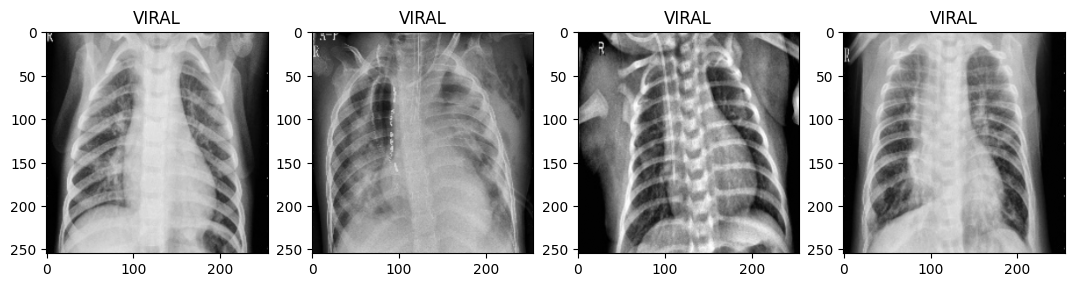

In [7]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(train_list[-5:-1], train_labels[-5:-1])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="BACTERIAL"
    elif label == 2:
        title ="VIRAL"
    plt.title(title)

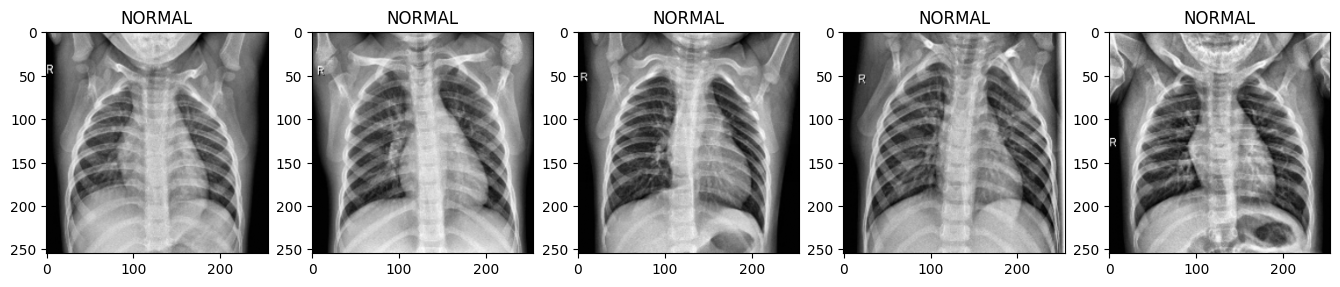

In [8]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(test_list[:5], test_labels[:5])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="BACTERIAL"
    elif label == 2:
        title ="VIRAL"
    plt.title(title)

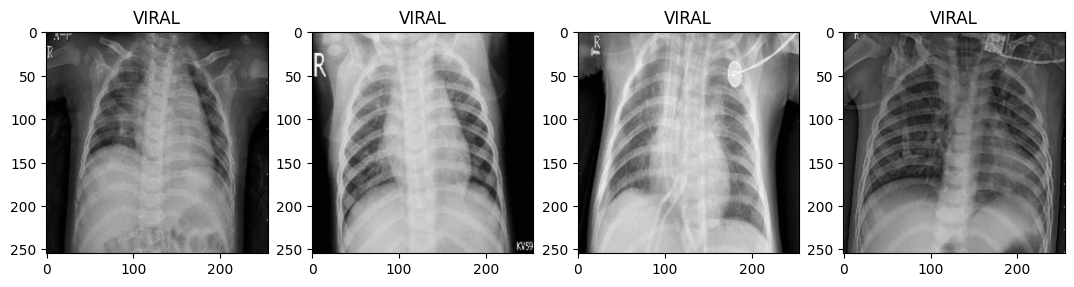

In [9]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(test_list[-5:-1], test_labels[-5:-1])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="BACTERIAL"
    elif label == 2:
        title ="VIRAL"
    plt.title(title)

In [10]:
X_train = np.array(train_list)
X_test = np.array(test_list)

In [11]:
y_train = utils.to_categorical(train_labels,num_classes = 3)
y_test = utils.to_categorical(test_labels,num_classes = 3)

In [12]:
y_train.shape
y_test.shape

(1044, 3)

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32,kernel_size = (3,3),padding = 'same',strides=1,activation = 'relu',input_shape=(X_train[0].shape)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(16,kernel_size = (3,3),padding = 'same',strides=1,activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 255, 255, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 127, 127, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 63504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     4,064,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,070,931 (15.53 MB)

 Trainable params: 4,070,931 (15.53 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.4851 - loss: 1.2153 - val_accuracy: 0.7510 - val_loss: 0.5333
Epoch 2/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.7755 - loss: 0.4950 - val_accuracy: 0.7778 - val_loss: 0.4954
Epoch 3/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.7931 - loss: 0.4684 - val_accuracy: 0.8046 - val_loss: 0.4554
Epoch 4/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.8121 - loss: 0.4142 - val_accuracy: 0.8305 - val_loss: 0.3750
Epoch 5/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.8408 - loss: 0.3475 - val_accuracy: 0.8506 - val_loss: 0.3428
Epoch 6/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8695 - loss: 0.2929 - val_accuracy: 0.8831 - val_loss: 0.3008
Epoch 7/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.8975 - loss: 0.2430 - val_accuracy: 0.8439 - val_loss: 0.3451
Epoch 8/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.9202 - loss: 0.1993 - val_accu

In [16]:
y_pred = model.predict(X_test)
y_pred = np.argmax(np.round(y_pred),axis=1)
y_pred

33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 313ms/step


array([0, 0, 0, ..., 2, 1, 2])

In [17]:
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95


<Figure size 800x600 with 0 Axes>

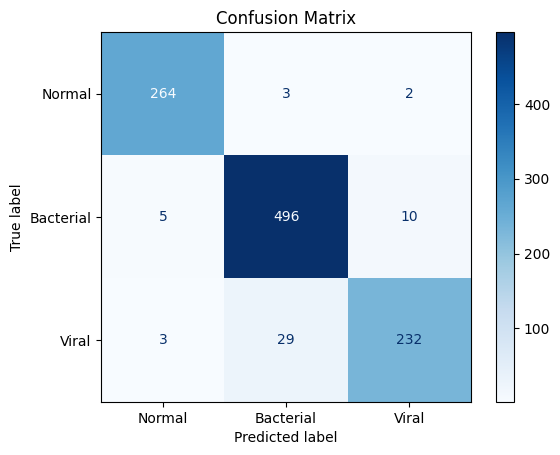

In [18]:
cm = confusion_matrix(test_labels, y_pred, labels=[0, 1, 2])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Bacterial", "Viral"])

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

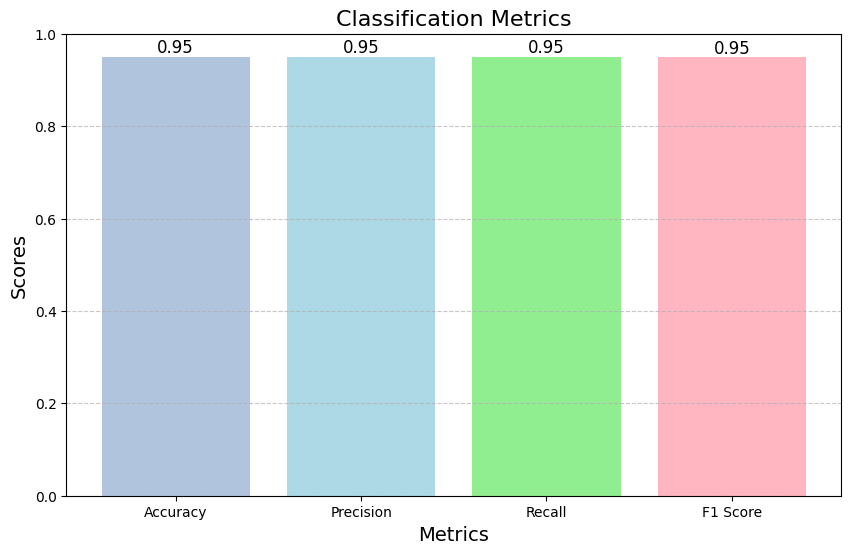

In [19]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]
colors = ['#B0C4DE', '#ADD8E6', '#90EE90', '#FFB6C1']

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=colors)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.title('Classification Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Scores', fontsize=14)

for index, value in enumerate(values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

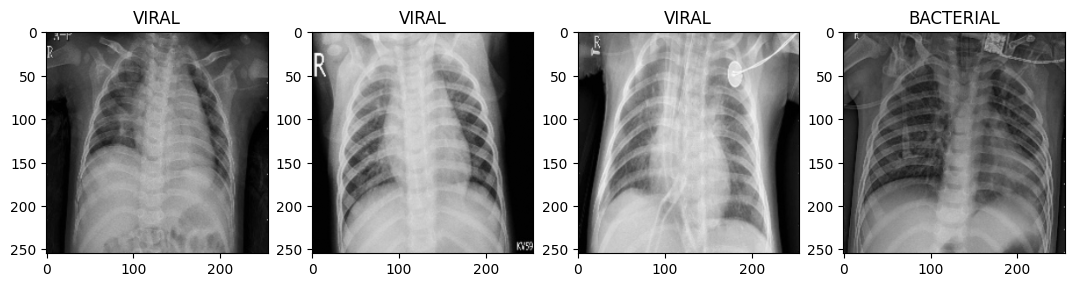

In [20]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(test_list[-5:-1], y_pred[-5:-1])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="BACTERIAL"
    elif label == 2:
        title ="VIRAL"
    plt.title(title)

In [21]:
model.save('CNN_model.h5')

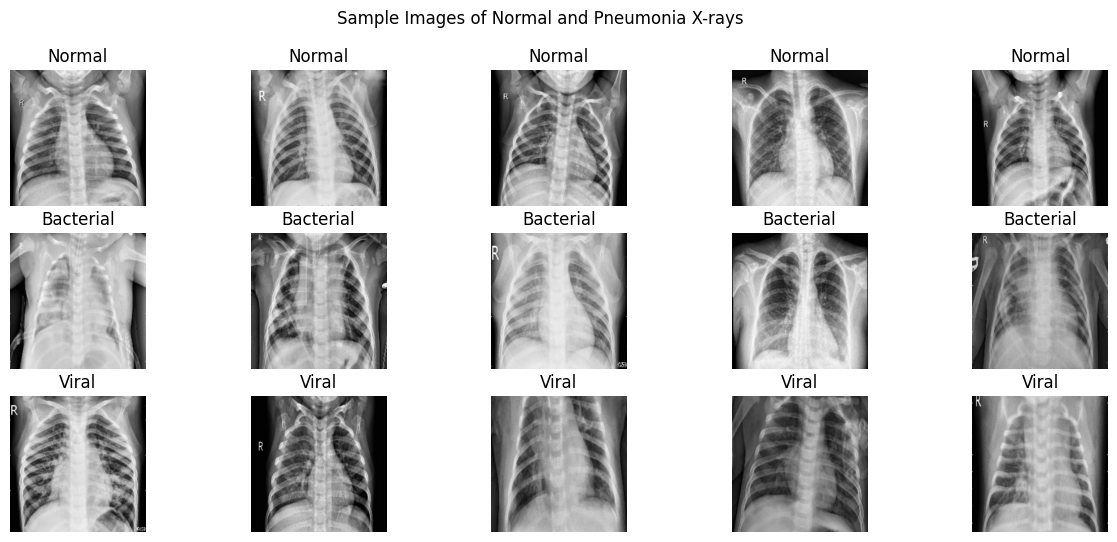

In [22]:
def plot_sample_images(class1_images, class2_images, class3_images, num_samples=5):
    fig, axes = plt.subplots(3, num_samples, figsize=(15, 6))
    fig.suptitle('Sample Images of Normal and Pneumonia X-rays')
    
    for i in range(num_samples):
        axes[0, i].imshow(class1_images[i])
        axes[0, i].axis('off')
        axes[0, i].set_title("Normal")
        
        axes[1, i].imshow(class2_images[i])
        axes[1, i].axis('off')
        axes[1, i].set_title("Bacterial")
        
        axes[2, i].imshow(class3_images[i])
        axes[2, i].axis('off')
        axes[2, i].set_title("Viral")

    plt.show()

plot_sample_images(train_class1, train_class2, train_class3)

In [23]:
from PIL import Image
def is_valid_xray(image_path):
    try:
        img = Image.open(image_path)
        img.verify()

        if img.mode != 'L':
            return False
        
        if img.size[0] < 100 or img.size[1] < 100: 
            return False

        return True
    except Exception as e:
        print(f"Invalid X-ray: {e}")
        return False

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


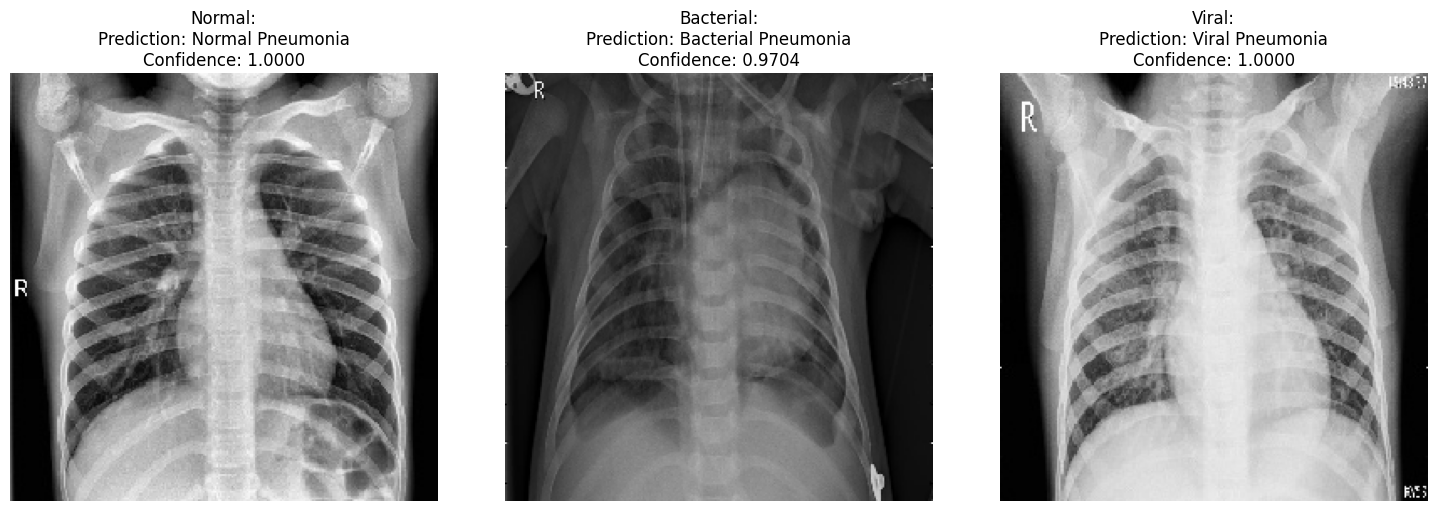

In [29]:
model_save_path = '/kaggle/working/CNN_model.h5'
model = load_model(model_save_path)

classes = ['Normal Pneumonia', 'Bacterial Pneumonia', 'Viral Pneumonia']

def classify_image(image_path, model):
    img = load_img(image_path, target_size=(255, 255))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    confidence = prediction[0][class_index]
    
    return img, classes[class_index], confidence

image_paths = {
    "Normal": '/kaggle/input/pnemonia/pnemonia/val/normal/1010.jpeg', 
    "Bacterial": '/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg',  
    "Viral": '/kaggle/input/pnemonia/pnemonia/val/virus/520.jpeg'           
}

# Validate and classify each image
results = {}
for label, path in image_paths.items():
    if is_valid_xray(path):  
        img, prediction, confidence = classify_image(path, model)
        results[label] = (img, prediction, confidence)
    else:
        results[label] = (None, "Invalid X-ray", 0)

# Display results
plt.figure(figsize=(15, 5))
for i, (label, (img, prediction, confidence)) in enumerate(results.items()):
    plt.subplot(1, 3, i + 1)
    if img:
        plt.imshow(img)
    else:
        plt.text(0.5, 0.5, "Invalid X-ray", ha='center', va='center', fontsize=12)
    plt.axis('off')
    plt.title(f"{label}:\nPrediction: {prediction}\nConfidence: {confidence:.4f}")

plt.tight_layout()
plt.show()